In [54]:
import pandas

# Load the Wine Quality Red dataset
file = pandas.read_csv("../../datasets/Position_Salaries.csv")


In [55]:
# use all datasets, dont split
X = file.iloc[:,1:2]
y = file.iloc[:,2:3]

# data is in regular array (1D)
print(X)
print(y)

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
    Salary
0    45000
1    50000
2    60000
3    80000
4   110000
5   150000
6   200000
7   300000
8   500000
9  1000000


In [56]:
import numpy as np

# data converted to 2D array

X = np.array(X)
y = np.array(y)

print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [57]:
# since our dependent variable (y) is larger we need to apply feature scaling for both X and y

from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
ss_y = StandardScaler()

X = ss_X.fit_transform(X)
y = ss_y.fit_transform(y)

print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Gaussian Kernel Radial Basis Function (RBF) formula

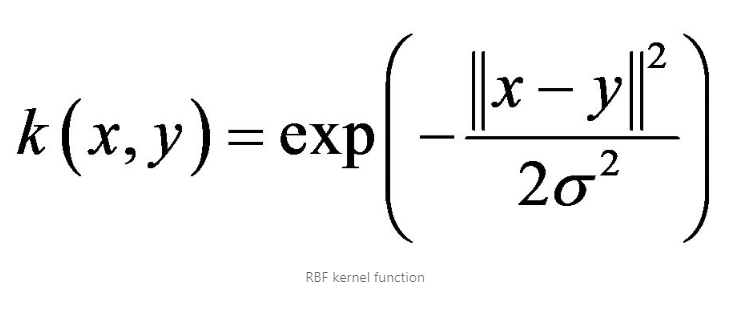

In [58]:
# from support-vector-machine import support-vector-regression
from sklearn.svm import SVR

# try all kernal and choose best one
# recommended : Gaussian Kernel Radial Basis Function (RBF)
regressor = SVR(kernel='rbf')

"""
Polynomial Kernel (poly), 
Gaussian Kernel Radial Basis Function (rbf),
Sigmoid Kernel (sigmoid)
"""

'\nPolynomial Kernel (poly), \nGaussian Kernel Radial Basis Function (rbf),\nSigmoid Kernel (sigmoid)\n'

In [59]:
# train SVR with rbf formula
regressor.fit(X,y)

# predict some data for above trained model
single_pred = ss_y.inverse_transform(regressor.predict(ss_X.transform([[6.5]])).reshape(-1,1))
print("single_pred: ",single_pred)
# ss_X.transform([[6.5]]) , here "transform()" is used to only to apply the formula of StandardScaler
# only use "fit" or "fit_transform" once and later use only "transform"
# here "inverse_transform" used to convert feature scaled value to original value 

single_pred:  [[170370.0204065]]


c:\Users\Amaan M k\anaconda3\envs\my_env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
# convert X and y data to original to plot the graph

X_data = ss_X.inverse_transform(X)

y_data = ss_y.inverse_transform(y)
y_pred = ss_y.inverse_transform(regressor.predict(X).reshape(-1,1))

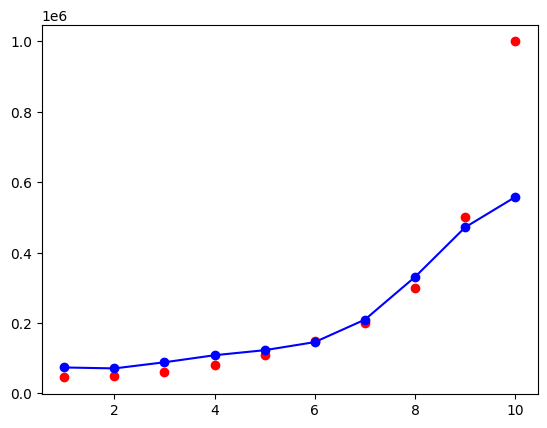

In [61]:
# visualize 
import matplotlib.pyplot as plt

# actual
plt.scatter(X_data,y_data,color='red')
# predicted
plt.scatter(X_data,y_pred,color='blue')
plt.plot(X_data,y_pred,color='blue')

# doing predictions

In [62]:
# single value prediction for the SVR model

single_pred = ss_y.inverse_transform(regressor.predict(ss_X.transform([[6.5]])).reshape(-1,1))
print("single_pred: ",single_pred)

single_pred:  [[170370.0204065]]


In [63]:
# all value predictions for the SVR model

# print the predicted results with nice looking output
# displaying the headings 
headings = ['Data to test', 'Actual', 'Predicted']
print('{:<20} {:<20} {:<20}'.format(*headings))
# displaying the data
data_comparison = np.concatenate((X_data, y_data, y_pred), axis=1)
for row in data_comparison:
    print('{:<20.2f} {:<20.2f} {:<20.2f}'.format(*row))

Data to test         Actual               Predicted           
1.00                 45000.00             73474.16            
2.00                 50000.00             70786.95            
3.00                 60000.00             88213.01            
4.00                 80000.00             108254.99           
5.00                 110000.00            122574.52           
6.00                 150000.00            145503.11           
7.00                 200000.00            209410.23           
8.00                 300000.00            330606.89           
9.00                 500000.00            471671.96           
10.00                1000000.00           557821.76           
